In [1]:
#패키지 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings

%matplotlib inline



warnings.simplefilter(action = 'ignore', category = FutureWarning) #FutureWarning 팝업 방지

#시각화 시 한글 깨짐 방지 및 마이너스 표시 오류 방지
if os.name == 'nt':
    font_family = 'NanumGothic'
else:
    font_family = 'AppleGothic'
    
sns.set(font = font_family, rc = {'axes.unicode_minus' : False}, font_scale = 3) 

#데이터프레임 내 지수 표현 제거 및 소수점 둘째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format 

#현 경로를 파라미터로 지정
SRC_PATH = os.path.join(os.getcwd(), "out") 


#데이터 정의(data_name)
KT_LIVING = "생활인구"
KT_IN_FLOW = "동단위유입인구"
KT_OUT_FLOW = "동단위유출인구"
KT_LIVING_YEAR = "생활인구_연도별"
KT_IN_FLOW_YEAR = "동단위유입인구_연도별"
KT_OUT_FLOW_YEAR = "동단위유출인구_연도별"

#성별, 연도 컬럼
AGE_LIST = ['남10대','남20대','남30대','남40대','남50대','남60대','남70대',
            '여10대','여20대','여30대','여40대','여50대','여60대','여70대',]

YEARS_LIST = [2018, 2019, 2020, 2021, 2022]


In [2]:
#연도별 데이터프레임을 하나로 통합
df_combine = pd.DataFrame()

for path in glob.glob(SRC_PATH+'\\'+KT_LIVING_YEAR+'\\**'):                                               
    df = pd.read_csv(path)
    df_combine = pd.concat([df_combine,df])
    
#날짜 컬럼들의 타입들을 datetime으로 변경
df_combine['일자'] = pd.to_datetime(df_combine['일자'])
df_combine['연'] = df_combine['일자'].dt.year
df_combine['월'] = df_combine['일자'].dt.month
df_combine['연월'] = df_combine['일자'].dt.to_period('M')


In [3]:
""" 
창원시를 하나로 통합하고 싶을 경우
"""

#df_combine.replace({'시군구' : ['창원시 마산합포구','창원시 마산회원구','창원시 의창구','창원시 성산구','창원시 진해구']}, '창원시', inplace = True)
#df_combine = df_combine.groupby(['일자', '연','월','연월','시간','시군구', '읍면동', '지역_상세']).sum().reset_index()

' \n창원시를 하나로 통합하고 싶을 경우\n'

In [4]:
df_combine_living_groupby_day_1 = df_combine.groupby(['일자','시군구','읍면동']).mean().reset_index().sort_values(by = '일자')
display(df_combine_living_groupby_day_1.head(10))

,일자,시군구,읍면동,연,월,시간,남10대,남20대,남30대,남40대,...,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
0,2018-01-01,거제시,거제면,2018.00,1.00,11.50,666.47,391.40,541.59,855.96,...,771.17,436.22,538.21,350.12,561.02,835.73,897.38,768.60,451.43,9179.40
207,2018-01-01,창원시 마산회원구,마산회원구 합성2동,2018.00,1.00,11.50,1014.41,1655.46,960.06,1066.96,...,938.71,483.50,887.96,1234.46,817.00,774.72,1178.32,1180.02,661.59,14040.32
206,2018-01-01,창원시 마산회원구,마산회원구 합성1동,2018.00,1.00,11.50,419.26,600.49,641.30,670.94,...,702.79,386.14,416.91,583.21,461.86,659.40,751.45,778.73,310.54,8126.98
205,2018-01-01,창원시 마산회원구,마산회원구 양덕2동,2018.00,1.00,11.50,1572.69,1468.08,1879.25,2306.64,...,1624.79,729.78,1497.97,1306.34,1959.69,2294.04,2343.18,1694.82,843.93,23816.76
204,2018-01-01,창원시 마산회원구,마산회원구 양덕1동,2018.00,1.00,11.50,643.52,754.57,891.05,862.67,...,813.41,436.60,481.75,598.62,829.75,842.32,1118.61,954.91,537.35,10878.43
203,2018-01-01,창원시 마산회원구,마산회원구 석전동,2018.00,1.00,11.50,1034.28,1357.79,1360.45,1798.68,...,1747.71,967.74,942.15,1063.83,1343.48,1574.62,2120.99,1977.51,1062.92,20475.07
202,2018-01-01,창원시 마산회원구,마산회원구 봉암동,2018.00,1.00,11.50,223.86,397.35,518.99,502.31,...,350.97,130.72,173.39,259.94,335.29,343.70,399.27,361.69,192.11,4721.33
201,2018-01-01,창원시 마산회원구,마산회원구 내서읍,2018.00,1.00,11.50,5963.24,3794.54,3845.66,6749.15,...,3712.37,1601.21,5564.67,3525.13,4021.21,7692.72,5546.41,3421.20,2065.59,64186.46
200,2018-01-01,창원시 마산회원구,마산회원구 구암2동,2018.00,1.00,11.50,567.87,777.94,862.88,944.78,...,859.20,441.43,550.75,624.03,758.05,858.69,1126.10,969.76,642.88,11049.40
199,2018-01-01,창원시 마산회원구,마산회원구 구암1동,2018.00,1.00,11.50,255.64,386.41,296.33,384.46,...,461.48,167.96,207.90,286.29,276.40,339.02,614.64,472.04,244.78,4874.27


In [5]:
#읍면동 일일 생활인구 평균

df_combine_living_groupby_day_1 = df_combine.groupby(['일자','시군구','읍면동']).mean().reset_index().sort_values(by = '일자')
 
 #시군구별 일일 생활인구 합계
df_combine_living_groupby_day_2 = df_combine_living_groupby_day_1.groupby(['일자','시군구']).sum().reset_index().sort_values(by = '일자')


df_combine_living_groupby_day_2['연'] = df_combine_living_groupby_day_2['일자'].dt.year
df_combine_living_groupby_day_2['월'] = df_combine_living_groupby_day_2['일자'].dt.month
df_combine_living_groupby_day_2['연월'] = df_combine_living_groupby_day_2['일자'].dt.to_period('M')

display(df_combine_living_groupby_day_2.head(10))


df_combine_living_groupby_day_3 = df_combine_living_groupby_day_2.groupby(['시군구','연']).mean().reset_index().sort_values(by = '합계', ascending = False)

display(df_combine_living_groupby_day_3.head(10))

,일자,시군구,연,월,시간,남10대,남20대,남30대,남40대,남50대,...,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계,연월
0,2018-01-01,거제시,2018,1,207.00,26503.60,18417.38,28787.22,37931.23,33118.12,...,6221.54,23706.32,15906.25,25699.69,34890.99,28320.38,16401.68,7244.35,321866.69,2018-01
21,2018-01-01,합천군,2018,1,195.50,2805.55,1766.87,2414.16,3946.91,5412.88,...,2301.90,2524.95,1463.79,2345.66,3790.69,4523.93,3509.15,2442.86,43548.02,2018-01
20,2018-01-01,함양군,2018,1,126.50,2794.60,1855.09,2054.02,4037.49,4806.06,...,2001.15,2525.64,1480.73,2323.49,3787.25,4172.53,3332.85,2278.50,40938.75,2018-01
19,2018-01-01,함안군,2018,1,115.00,4320.29,4020.44,4618.34,7023.73,7631.31,...,2236.58,3703.77,2707.92,4124.46,5940.62,6350.49,4272.32,2368.28,64656.30,2018-01
18,2018-01-01,하동군,2018,1,149.50,1889.11,1480.68,1988.52,3567.64,4582.94,...,1952.91,1760.51,1218.52,2023.00,3064.17,3784.72,3498.96,2232.66,36484.12,2018-01
17,2018-01-01,통영시,2018,1,172.50,9897.89,7487.83,10879.36,15792.38,15326.38,...,3976.38,8592.66,6514.08,9955.12,14215.23,14039.07,9555.79,4418.95,140240.08,2018-01
16,2018-01-01,창원시 진해구,2018,1,149.50,9102.02,8953.14,11797.70,13738.87,12580.48,...,4514.53,7481.05,6634.80,10786.54,12074.60,12012.34,9198.73,5048.56,133466.38,2018-01
14,2018-01-01,창원시 성산구,2018,1,92.00,16229.71,21181.82,16656.97,20182.60,25166.70,...,3685.74,14139.60,16213.09,14617.55,22532.45,23357.24,9822.52,4495.85,219673.93,2018-01
13,2018-01-01,창원시 마산회원구,2018,1,138.00,12812.03,12490.25,12631.03,17167.88,18486.63,...,6429.40,11869.52,10580.72,11993.24,17230.72,17636.30,13819.30,7650.99,184007.53,2018-01
12,2018-01-01,창원시 마산합포구,2018,1,172.50,9619.69,10828.94,11969.26,14531.25,17248.83,...,6400.43,8509.12,9091.68,11203.19,14595.29,17362.84,13993.99,7412.21,166189.47,2018-01


,시군구,연,월,시간,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
18,김해시,2021,6.53,218.50,29615.08,31269.88,35479.89,42682.83,44362.04,25337.53,11618.42,27480.56,25260.81,31304.10,43862.94,42749.35,24859.62,15175.50,431058.55
19,김해시,2022,3.01,218.50,29200.49,30947.89,34831.04,42319.24,44586.44,25884.61,11945.09,27185.99,24969.47,30939.58,44043.98,43262.22,24959.31,15469.91,430545.26
17,김해시,2020,6.51,218.50,29973.60,30601.69,35077.28,42572.84,43690.05,24652.50,11368.99,27401.07,25379.66,31963.93,43760.62,41570.00,24005.65,15048.23,427066.11
16,김해시,2019,6.53,218.50,28911.25,28912.65,34048.57,42394.82,43295.24,23949.23,10845.79,26430.83,23665.28,31766.10,43915.01,40116.27,23471.78,14388.40,416111.20
15,김해시,2018,6.53,218.50,29326.25,29529.31,33679.75,42403.56,43125.86,23183.76,10400.02,26309.19,22998.46,31224.66,43706.43,38601.99,22709.22,13312.54,410511.01
2,거제시,2020,6.51,207.00,27863.63,16731.65,26091.31,38497.31,33847.80,19177.32,6983.38,24847.55,13957.27,24567.47,36329.98,28460.18,16815.52,7753.97,321924.34
3,거제시,2021,6.53,207.00,27565.90,15296.42,23244.81,37389.58,34344.85,19243.80,7228.20,24831.02,13214.15,22943.22,36608.11,28779.13,17701.06,8259.19,316649.44
1,거제시,2019,6.53,207.00,26670.07,15213.51,27533.81,38747.11,32938.21,18441.66,6657.96,23664.34,12740.83,25722.20,35874.01,28027.19,16383.82,7404.94,316019.66
4,거제시,2022,3.01,207.00,27020.04,14308.37,20823.49,35568.24,34468.18,19278.27,7628.30,24061.06,12527.44,21802.51,36152.29,29402.32,18202.34,8678.19,309921.01
0,거제시,2018,6.53,207.00,26171.61,15491.39,28700.15,37371.23,32178.26,17606.62,6140.10,22924.42,12767.98,25876.02,34569.52,26988.99,15437.11,6871.32,309094.71


In [6]:
year_pivot_living = df_combine_living_groupby_day_3[['연','시군구','합계']]

year_pivot_living.drop(year_pivot_living.loc[year_pivot_living['연'] == 2022].index, inplace = True)

real_in_pivot = year_pivot_living.pivot(index = '시군구', columns = '연', values = '합계').sort_values(by = [2018,2019,2020,2021], ascending = False)

C:\Users\user\AppData\Local\Temp\ipykernel_262632\804011866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_pivot_living.drop(year_pivot_living.loc[year_pivot_living['연'] == 2022].index, inplace = True)


C:\Users\user\AppData\Local\Temp\ipykernel_262632\1331255996.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


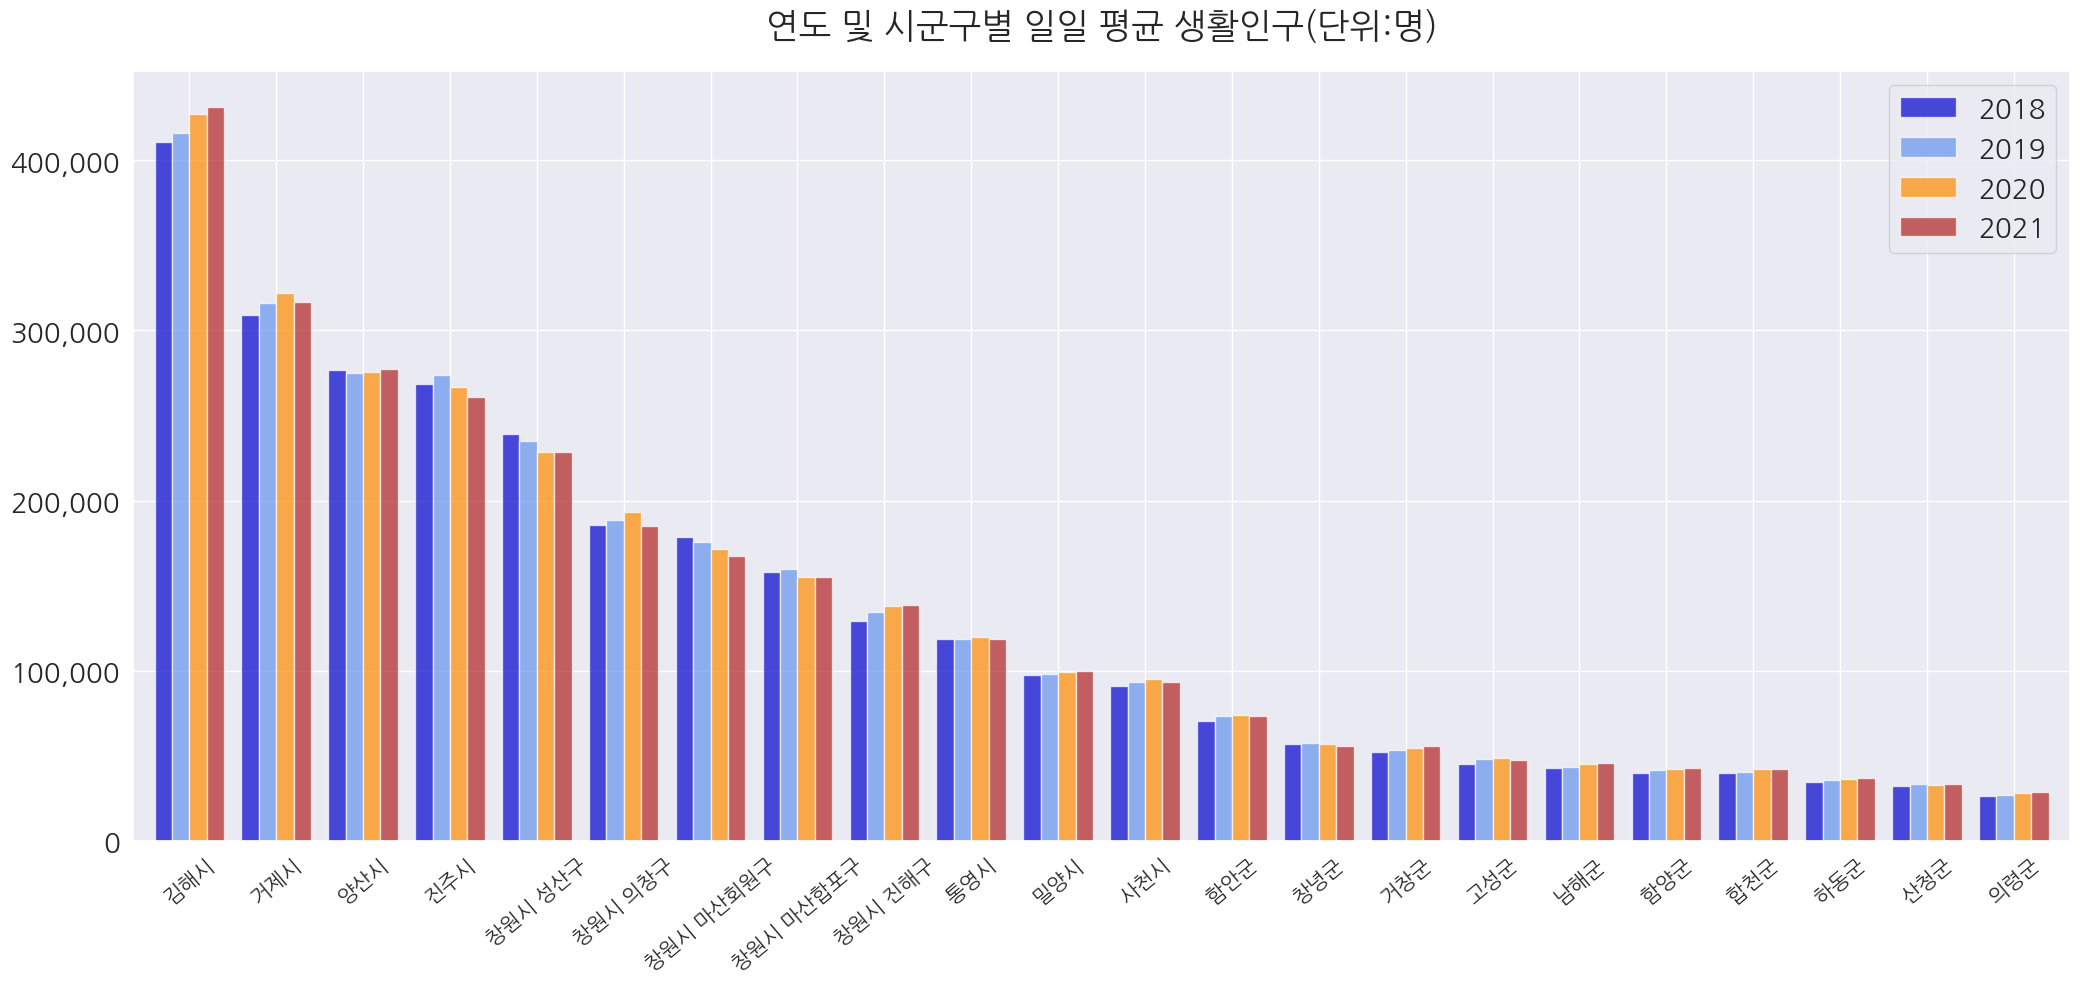

In [7]:
real_in_pivot.plot(kind = 'bar', figsize = (25,10), width = 0.8,alpha = 0.7,
                   color = ['mediumblue','cornflowerblue','darkorange','firebrick'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('연도 및 시군구별 일일 평균 생활인구(단위:명)', fontsize = 25, pad = 25)
plt.xlabel('')
plt.xticks(rotation = 40, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size' : 20})


plt.show()

In [8]:
df_combine_living_groupby_day_2['10대'] = df_combine_living_groupby_day_2[['남10대','여10대']].sum(axis = 1)
df_combine_living_groupby_day_2['20대 ~ 30대'] = df_combine_living_groupby_day_2[['남20대','남30대','여20대','여30대']].sum(axis = 1)
df_combine_living_groupby_day_2['40대 ~ 50대'] = df_combine_living_groupby_day_2[['남40대','남50대','여40대','여50대']].sum(axis = 1)
df_combine_living_groupby_day_2['60대 ~ 70대'] = df_combine_living_groupby_day_2[['남60대','남70대','여60대','여70대']].sum(axis = 1)


df_combine_in_group = df_combine_living_groupby_day_2.groupby(['시군구'])[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대','합계']].mean().reset_index()

display(df_combine_in_group.head())

,시군구,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대,합계
0,거제시,51130.60,79034.57,135272.12,49926.34,315363.63
1,거창군,7082.69,9929.89,21962.03,15176.21,54150.82
2,고성군,4835.99,8832.23,19867.58,13905.70,47441.49
3,김해시,56364.88,120649.53,171031.75,74020.83,422067.00
4,남해군,4952.87,7960.90,18030.15,13420.42,44364.35


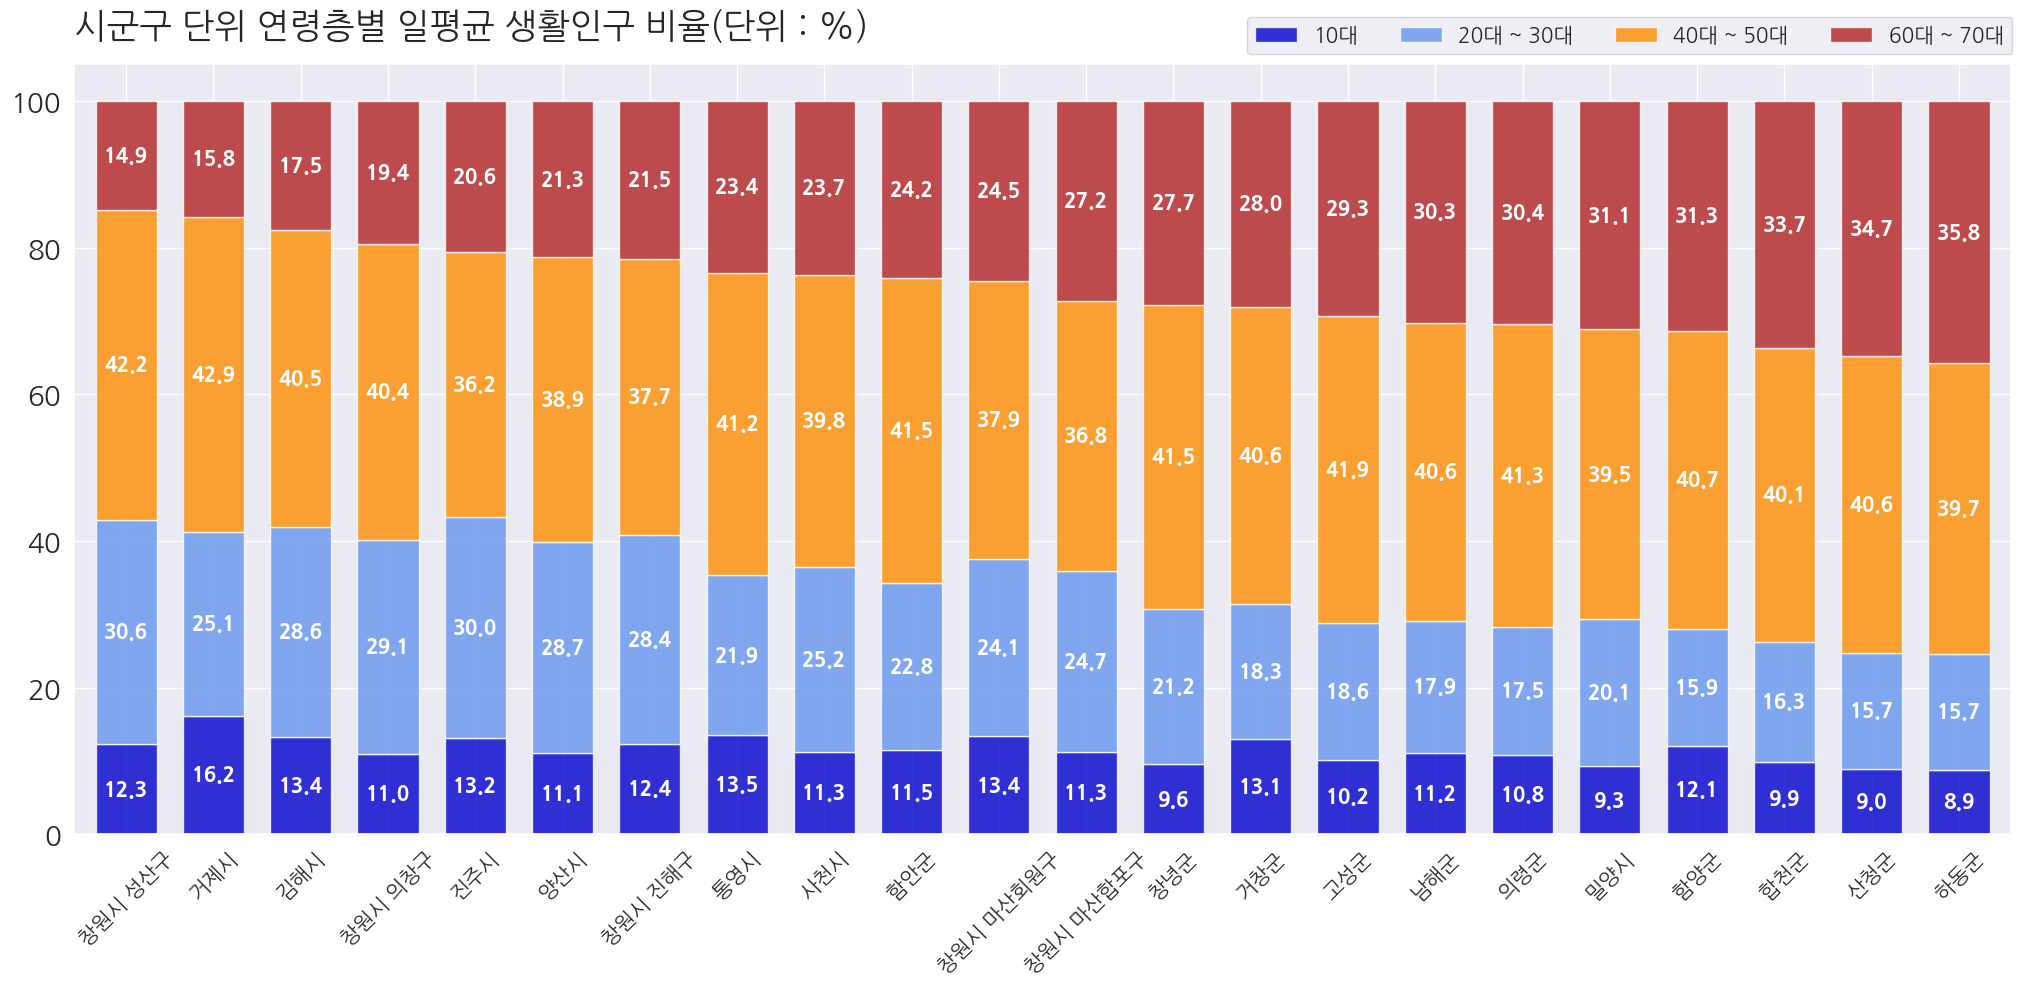

In [9]:
ax = df_combine_in_group.set_index('시군구')[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대']].apply(lambda x : x*100/sum(x), axis = 1).sort_values(by = '60대 ~ 70대', ascending = True).plot(kind = 'bar', stacked = True,
                                                                                                                                                                                                 figsize = (25,10), width = 0.7, alpha = 0.8,
                                                                                                                                                                                                color = ['mediumblue','cornflowerblue','darkorange','firebrick'])

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{height:.1f}' 
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center', color = 'white', size = 15, fontweight = 'bold')
    
    
plt.title('시군구 단위 연령층별 일평균 생활인구 비율(단위 : %)', fontsize = 25, pad = 20, loc = 'left')
plt.xlabel('')
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor =(0.6,1), prop = {'size' : 15}, loc = 'lower left', ncol = 4)


plt.show()

In [10]:
#시군구별 월 생활인구 평균
 
df_combine_living_groupby_month_1 = df_combine_living_groupby_day_2.groupby(['연월','시군구']).sum().reset_index().sort_values(by = '연월')

df_combine_living_groupby_month_1['연'] = df_combine_living_groupby_month_1['연월'].dt.year
df_combine_living_groupby_month_1['월'] = df_combine_living_groupby_month_1['연월'].dt.month

display(df_combine_living_groupby_month_1.head(10))


df_combine_living_groupby_month_2 = df_combine_living_groupby_month_1.groupby(['시군구','연']).mean().reset_index().sort_values(by = '합계', ascending = False)

display(df_combine_living_groupby_month_2.head(10))

,연월,시군구,연,월,시간,남10대,남20대,남30대,남40대,남50대,...,여30대,여40대,여50대,여60대,여70대,합계,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대
0,2018-01,거제시,2018,1,6417.00,834072.15,533348.54,946564.39,1197853.16,1026216.40,...,817194.81,1076371.59,841364.27,475377.73,212463.79,9881551.05,1573943.60,2728741.73,4141805.43,1437060.29
21,2018-01,합천군,2018,1,6060.50,77881.50,44167.14,61269.90,108074.64,152822.33,...,56613.82,96436.33,120207.69,98457.34,70950.32,1178060.32,140807.87,194909.47,477540.99,364801.98
20,2018-01,함양군,2018,1,3921.50,79001.23,45788.86,55820.68,113118.47,138786.73,...,57796.70,104715.83,118366.49,99687.10,70489.71,1153111.78,150861.46,194006.87,474987.51,333255.93
19,2018-01,함안군,2018,1,3565.00,138572.61,136555.28,174836.62,247561.66,270710.78,...,122014.51,189162.35,197455.60,134316.67,71984.42,2115469.04,251408.46,505663.58,904890.39,453506.61
18,2018-01,하동군,2018,1,4634.50,46147.81,39553.82,50214.48,100614.49,127969.41,...,48036.16,75640.68,101230.61,99225.06,67241.67,988016.58,90183.38,164320.54,405455.19,328057.46
17,2018-01,통영시,2018,1,5347.50,274781.93,185402.11,280387.63,406567.67,401669.86,...,265707.03,377723.44,369902.98,268382.99,129816.84,3729161.28,511695.72,881406.17,1555863.96,780195.44
16,2018-01,창원시 진해구,2018,1,4634.50,280183.61,278926.06,352611.44,416971.44,389703.68,...,330658.11,367815.83,363041.46,279245.09,153932.64,4078744.66,515469.30,1149525.92,1537532.41,876217.04
14,2018-01,창원시 성산구,2018,1,2852.00,534860.68,687345.38,659880.66,775400.42,917418.99,...,520322.82,790039.91,815573.34,332308.67,158436.17,7697292.11,997022.55,2388757.79,3298432.65,1013079.12
13,2018-01,창원시 마산회원구,2018,1,4278.00,408488.73,353503.09,369555.25,512642.09,562655.00,...,378581.28,554614.75,572176.26,438183.75,238782.15,5699587.32,785905.91,1418631.90,2202088.09,1292961.41
12,2018-01,창원시 마산합포구,2018,1,5347.50,290530.54,316949.16,336051.66,416281.79,497698.51,...,327482.72,424352.51,524655.02,425661.65,236206.08,4918723.62,551558.62,1243384.25,1862987.83,1260792.92


,시군구,연,월,시간,남10대,남20대,남30대,남40대,남50대,남60대,...,여30대,여40대,여50대,여60대,여70대,합계,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대
18,김해시,2021,6.50,6646.04,900791.92,951125.64,1079179.98,1298269.43,1349345.49,770683.18,...,952166.35,1334164.43,1300292.75,756146.65,461588.08,13111364.19,1736658.95,3750821.70,5282072.09,2341811.45
17,김해시,2020,6.50,6664.25,914194.81,933351.50,1069856.94,1298471.76,1332546.38,751901.27,...,974900.00,1334698.98,1267885.10,732172.22,458971.15,13025516.35,1749927.39,3752187.97,5233602.23,2289798.77
19,김해시,2022,3.00,6598.70,881854.81,934626.21,1051897.53,1278041.18,1346510.41,781715.17,...,934375.27,1330128.22,1306519.13,753771.15,467191.36,13002466.98,1702871.61,3674977.00,5261198.94,2363419.43
16,김해시,2019,6.50,6646.04,879383.86,879426.55,1035644.01,1289508.98,1316896.86,728455.61,...,966218.90,1335748.16,1220203.23,713933.25,437647.07,12656715.69,1683321.54,3601108.29,5162357.23,2209928.63
15,김해시,2018,6.50,6646.04,892006.86,898183.21,1024425.67,1289775.03,1311744.89,705172.66,...,949750.13,1329403.99,1174143.72,690738.80,404923.07,12486376.41,1692244.83,3571895.50,5105067.62,2117168.46
2,거제시,2020,6.50,6313.50,849840.65,510315.48,795785.09,1174168.00,1032357.78,584908.39,...,749307.70,1108064.46,868035.37,512873.37,236496.12,9818692.51,1607690.83,2481104.97,4182625.61,1547271.09
3,거제시,2021,6.50,6296.25,838462.90,465266.00,707029.70,1137266.31,1044655.94,585332.30,...,697856.29,1113496.76,875365.14,538407.29,251216.97,9631420.46,1593739.76,2272082.30,4170784.16,1594814.24
1,거제시,2019,6.50,6296.25,811214.65,462744.23,837486.85,1178557.99,1001870.56,560933.78,...,782383.43,1091167.82,852493.78,498341.29,225233.50,9612264.70,1531005.12,2470147.98,4124090.14,1487021.47
0,거제시,2018,6.50,6296.25,796053.20,471196.54,872962.82,1136708.36,978755.40,535534.56,...,787062.13,1051489.65,820914.97,469545.42,209002.74,9401630.71,1493337.50,2519580.73,3987868.38,1400844.09
4,거제시,2022,3.00,6251.40,816005.28,432112.78,628869.30,1074160.76,1040938.90,582203.77,...,658435.77,1091799.07,887949.96,549710.61,262081.31,9359614.58,1542649.19,2097746.51,4094848.70,1624370.19


In [11]:
month_pivot_living = df_combine_living_groupby_month_2[['연','시군구','합계']]

month_pivot_living.drop(month_pivot_living.loc[month_pivot_living['연'] == 2022].index, inplace = True)

real_living_pivot_month = month_pivot_living.pivot(index = '시군구', columns = '연', values = '합계').sort_values(by = [2018,2019,2020,2021], ascending = False)

C:\Users\user\AppData\Local\Temp\ipykernel_262632\3136090073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_pivot_living.drop(month_pivot_living.loc[month_pivot_living['연'] == 2022].index, inplace = True)


C:\Users\user\AppData\Local\Temp\ipykernel_262632\2130624923.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


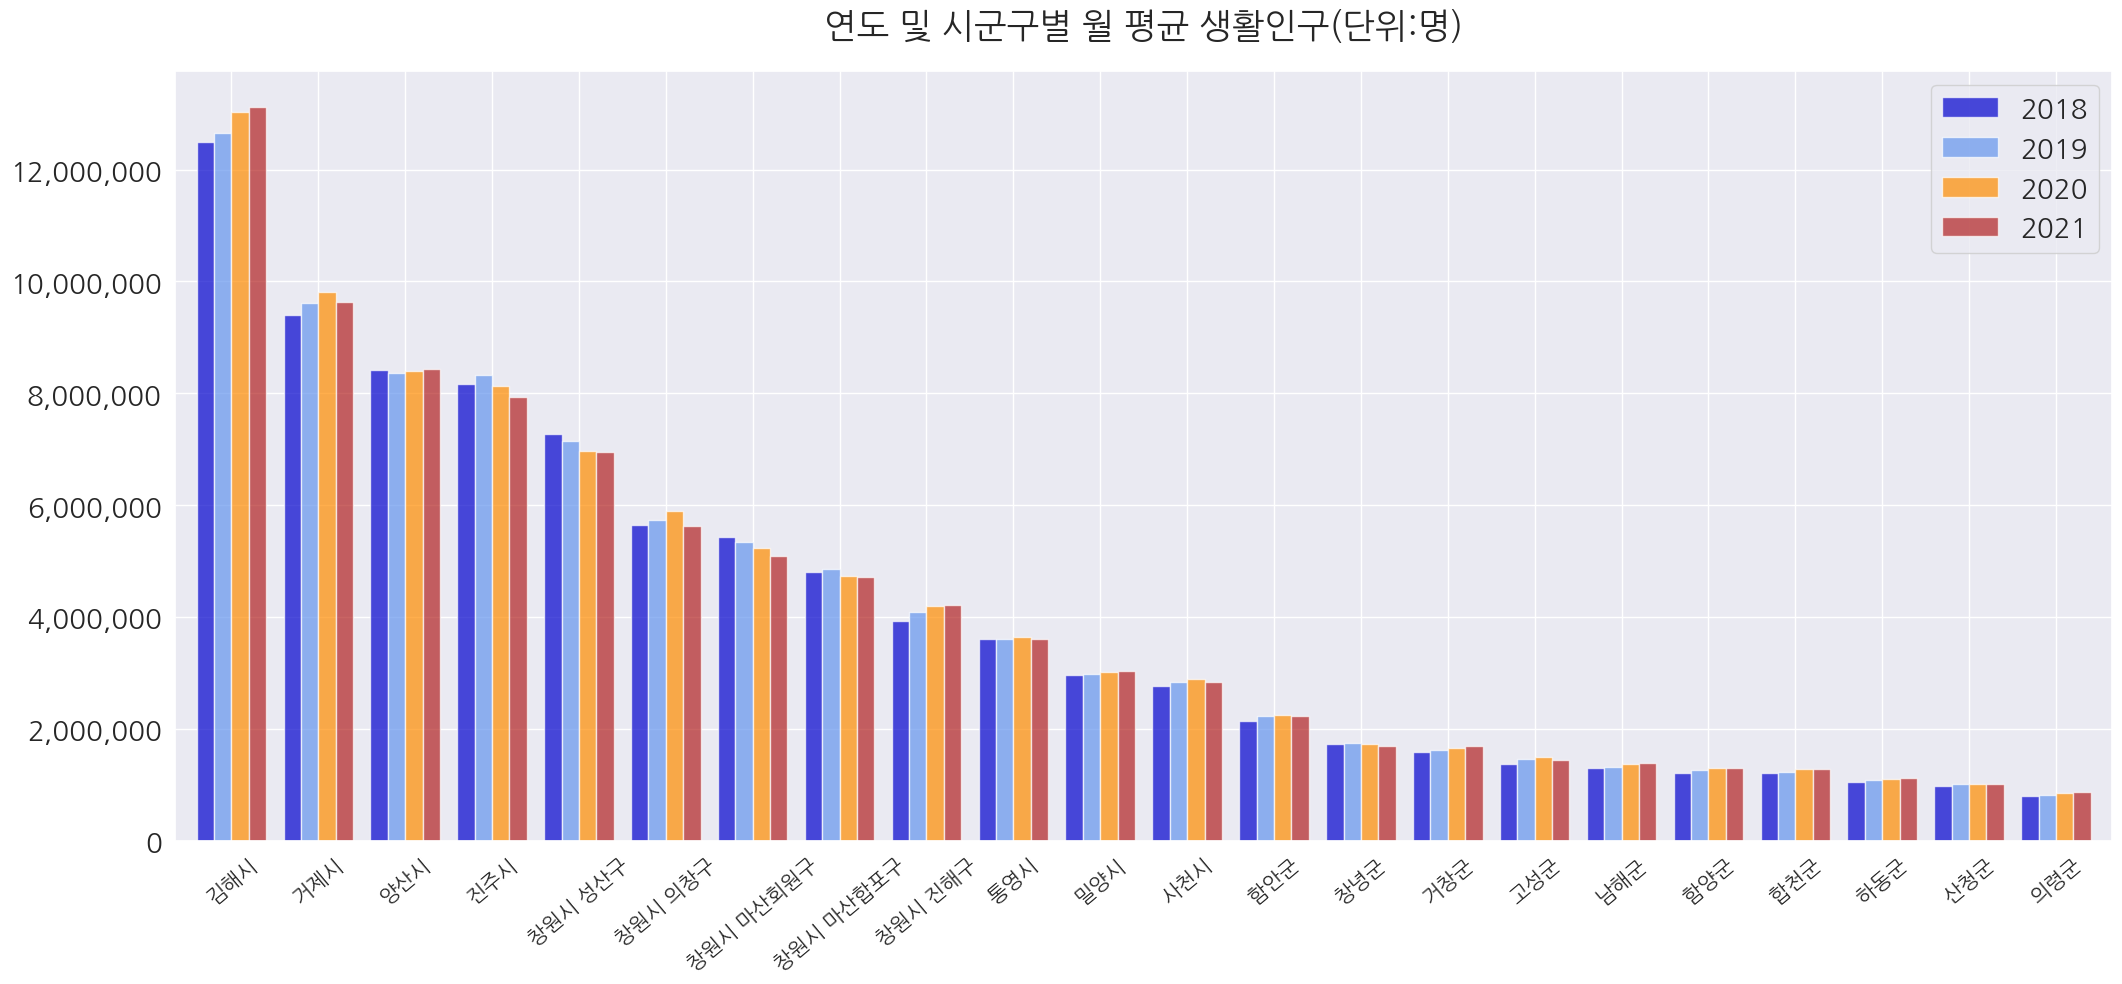

In [12]:
real_living_pivot_month.plot(kind = 'bar', figsize = (25,10), width = 0.8,alpha = 0.7,
                            color = ['mediumblue','cornflowerblue','darkorange','firebrick'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('연도 및 시군구별 월 평균 생활인구(단위:명)', fontsize = 25, pad = 25)
plt.xlabel('')
plt.xticks(rotation = 40, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size' : 20})


plt.show()

In [13]:
df_combine_living_groupby_month_1['10대'] = df_combine_living_groupby_month_1[['남10대','여10대']].sum(axis = 1)
df_combine_living_groupby_month_1['20대 ~ 30대'] = df_combine_living_groupby_month_1[['남20대','남30대','여20대','여30대']].sum(axis = 1)
df_combine_living_groupby_month_1['40대 ~ 50대'] = df_combine_living_groupby_month_1[['남40대','남50대','여40대','여50대']].sum(axis = 1)
df_combine_living_groupby_month_1['60대 ~ 70대'] = df_combine_living_groupby_month_1[['남60대','남70대','여60대','여70대']].sum(axis = 1)


df_combine_living_group_month = df_combine_living_groupby_month_1.groupby(['시군구'])[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대','합계']].mean().reset_index()
display(df_combine_living_group_month.head())

,시군구,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대,합계
0,거제시,1555141.97,2403843.85,4114314.40,1518514.37,9591814.59
1,거창군,215420.54,302018.57,667977.21,461585.98,1647002.30
2,고성군,147087.07,268632.99,604274.25,422943.07,1442937.37
3,김해시,1714343.22,3669566.92,5201946.88,2251350.66,12837207.67
4,남해군,150642.07,242131.67,548388.85,408183.32,1349345.91


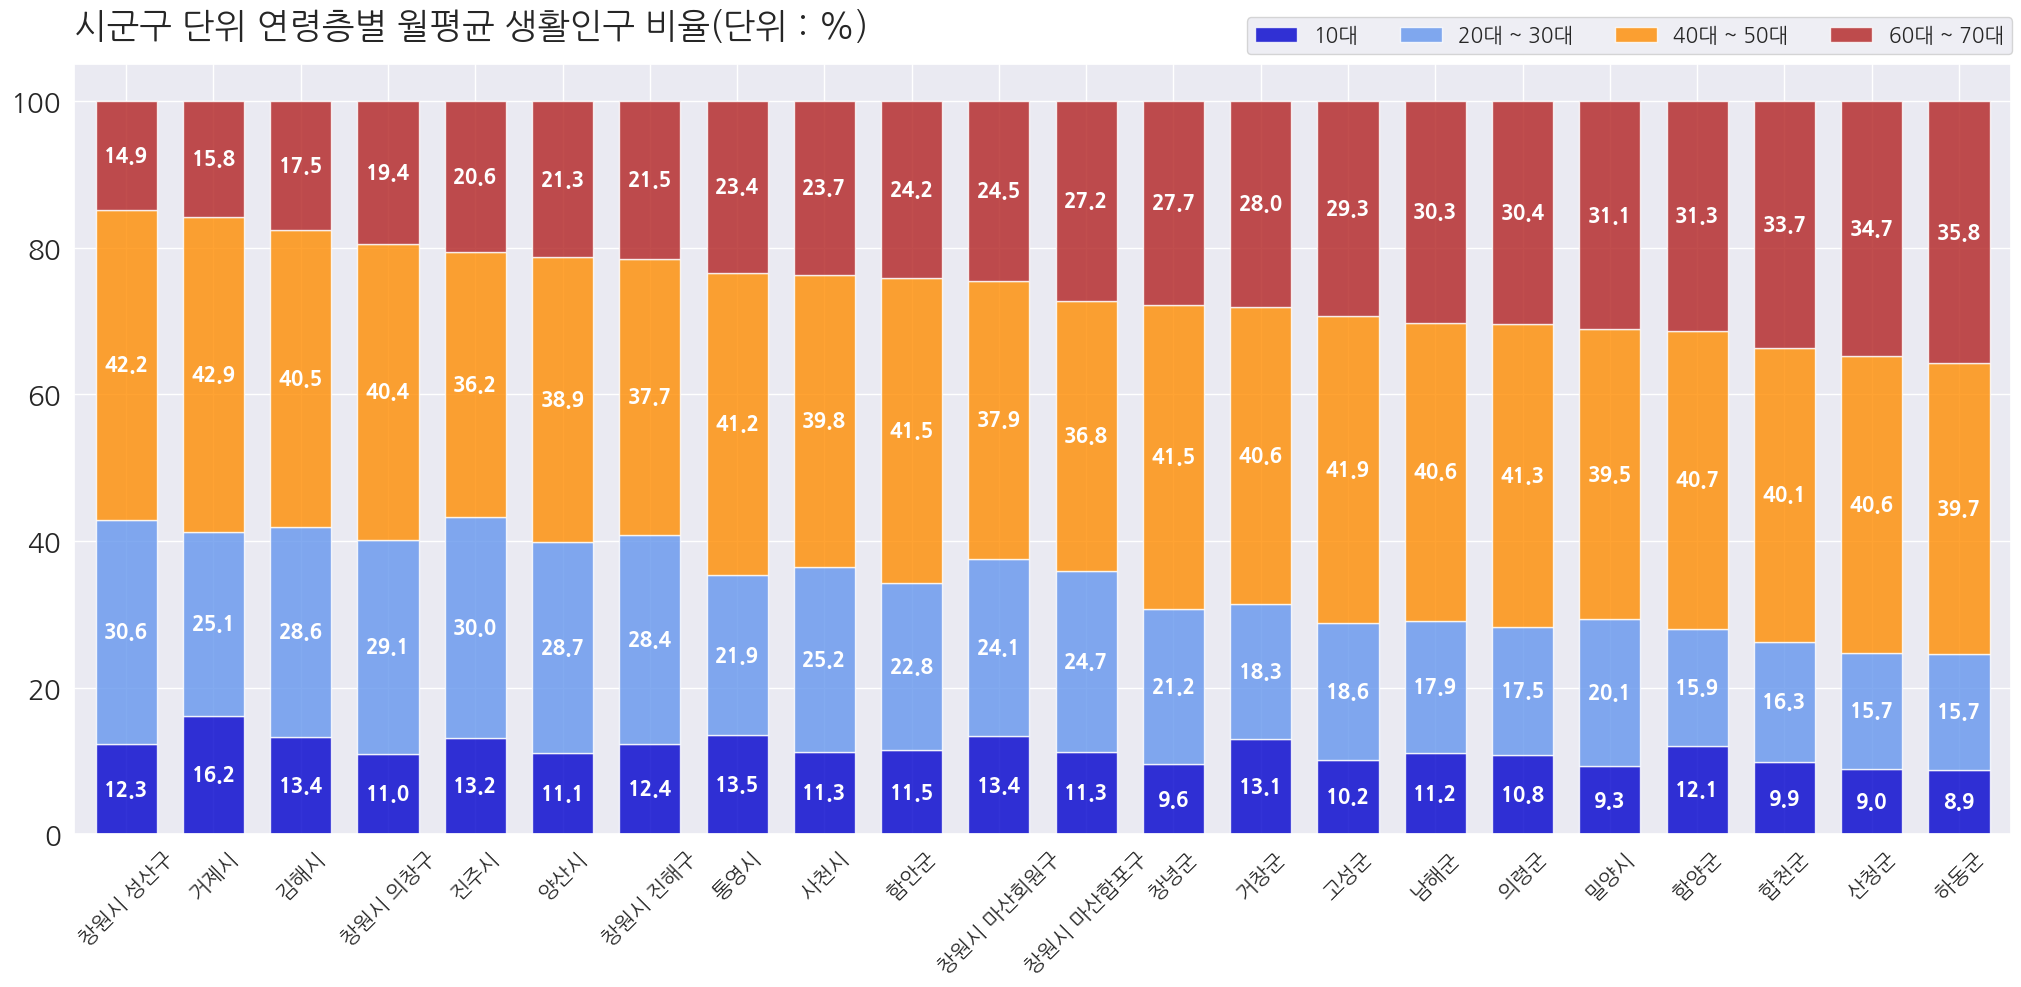

In [14]:
ax = df_combine_living_group_month.set_index('시군구')[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대']].apply(lambda x : x*100/sum(x), axis = 1).sort_values(by = '60대 ~ 70대', ascending = True).plot(kind = 'bar', stacked = True,
                                                                                                                                                                                                         figsize = (25,10), width = 0.7, alpha = 0.8,
                                                                                                                                                                                                        color = ['mediumblue','cornflowerblue','darkorange','firebrick'])

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{height:.1f}' 
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center', color = 'white', size = 15, fontweight = 'bold')
    
    
plt.title('시군구 단위 연령층별 월평균 생활인구 비율(단위 : %)', fontsize = 25, pad = 20, loc = 'left')
plt.xlabel('')
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor =(0.6,1), prop = {'size' : 15}, loc = 'lower left', ncol = 4)


plt.show()

In [15]:
#주민등록인구와 일일생활인구평균과 비교(2021년 기준)
admin_pop = pd.read_csv('D:\\GNI\\data\\analysis\\rawdata_kb\\src\\행정구역_시군구_별__성별_인구수_20221019093349.csv', encoding = 'cp949')


In [16]:
admin_pop.drop(0, axis = 0, inplace = True)

admin_pop.replace({'시군구' : {'의창구' : '창원시 의창구', '성산구' : '창원시 성산구', '마산합포구' : '창원시 마산합포구','마산회원구' : '창원시 마산회원구','진해구':'창원시 진해구'}}, inplace = True)

In [17]:
admin_pop = admin_pop.sort_values(by = '시군구', ascending = False).reset_index().drop('index', axis = 1)
display(admin_pop)

,시군구,총인구수,남자인구수,여자인구수
0,합천군,42935,20765,22170
1,함양군,38310,18531,19779
2,함안군,62547,31816,30731
3,하동군,43449,21696,21753
4,통영시,125383,62928,62455
5,창원시 진해구,194949,100077,94872
6,창원시 의창구,218027,110998,107029
7,창원시 성산구,251562,128346,123216
8,창원시 마산회원구,186881,93661,93220
9,창원시 마산합포구,181322,90141,91181


In [18]:
df_2021 = df_combine_living_groupby_day_3[df_combine_living_groupby_day_3['연'] == 2021].sort_values(by = '시군구', ascending = False).reset_index().drop('index', axis = 1)
df_2021

,시군구,연,월,시간,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
0,합천군,2021,6.53,195.50,2162.74,1724.18,2107.50,3396.10,5682.09,4672.63,2646.82,1676.44,1284.49,1694.52,3064.73,4482.92,4235.07,3452.44,42282.69
1,함양군,2021,6.53,126.50,2663.45,1753.07,1830.48,3600.08,5315.88,3881.84,2561.49,2359.53,1300.01,1772.75,3338.50,4607.79,3873.52,3733.08,42591.49
2,함안군,2021,6.53,115.00,4574.70,4954.40,5213.51,7558.62,9262.35,6675.38,3036.12,3818.59,2536.37,3826.81,6075.50,7072.13,5369.60,3469.07,73443.15
3,하동군,2021,6.53,149.50,1782.78,1344.77,1640.19,3177.72,4420.88,3935.01,2503.72,1482.48,1030.43,1578.46,2666.43,3894.50,4050.09,3208.48,36715.96
4,통영시,2021,6.53,172.50,8569.52,5655.91,7635.84,12240.40,12675.63,9116.75,4777.11,7431.05,4422.17,7150.75,11909.77,11663.91,9576.27,5922.46,118747.54
5,창원시 진해구,2021,6.53,149.50,9830.41,12299.57,10811.97,14190.40,13097.44,9716.12,5118.94,7801.14,6224.02,9614.31,12898.05,11735.31,9493.68,5767.12,138598.48
6,창원시 의창구,2021,6.53,80.50,10736.52,13741.40,14710.37,16742.76,19386.85,13070.31,5383.55,9536.06,11488.05,13821.32,16823.78,20629.11,13027.69,6118.82,185216.60
7,창원시 성산구,2021,6.53,92.00,14959.12,18844.12,19346.86,21127.62,26015.82,14192.57,4498.60,12909.17,15502.51,15616.93,21402.71,26349.57,12625.26,5195.95,228586.82
8,창원시 마산회원구,2021,6.53,138.00,11355.46,9873.53,10129.83,13936.81,16221.46,12314.44,7123.23,10905.07,9461.47,10443.67,15516.19,17042.05,13823.93,9190.98,167338.14
9,창원시 마산합포구,2021,6.53,172.50,9300.53,10057.73,9781.21,13198.40,14367.15,12267.44,7335.73,8333.04,8445.21,9741.75,13573.55,15383.03,14036.49,9380.49,155201.76


In [19]:
merge = pd.merge(admin_pop, df_2021[['시군구','합계']], on = '시군구')

merge.columns = ['시군구','주민등록_총인구수','주민등록_남자인구수','주민등록_여자인구수','일일생활인구_평균']

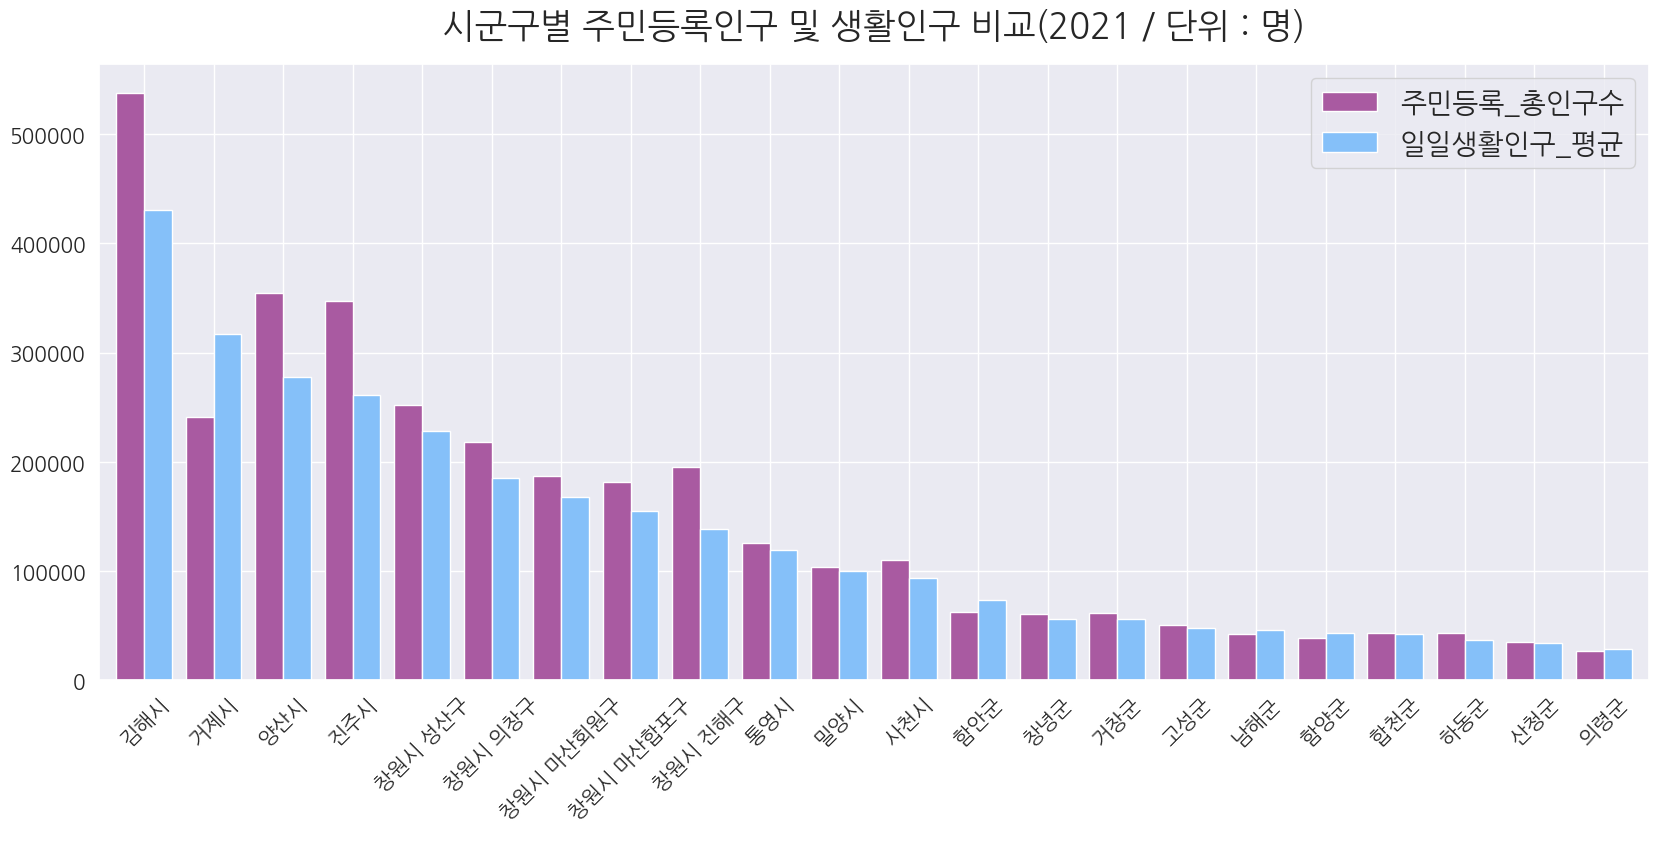

In [20]:
sns.set(font = font_family, rc = {'axes.unicode_minus' : False}) 

merge[['시군구','주민등록_총인구수', '일일생활인구_평균']].set_index('시군구').sort_values(by = '일일생활인구_평균', ascending = False).plot(kind = 'bar', figsize = (20,8)
                                                                                                               ,width = 0.8, color = ['#A95AA1','#85C0F9'])
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(' ')
plt.title('시군구별 주민등록인구 및 생활인구 비교(2021 / 단위 : 명)', loc= 'center', fontsize = 25, pad = 20)
plt.legend(prop = {'size':20})

## ----------------------------------------------------------------------------------------------------------------------------------

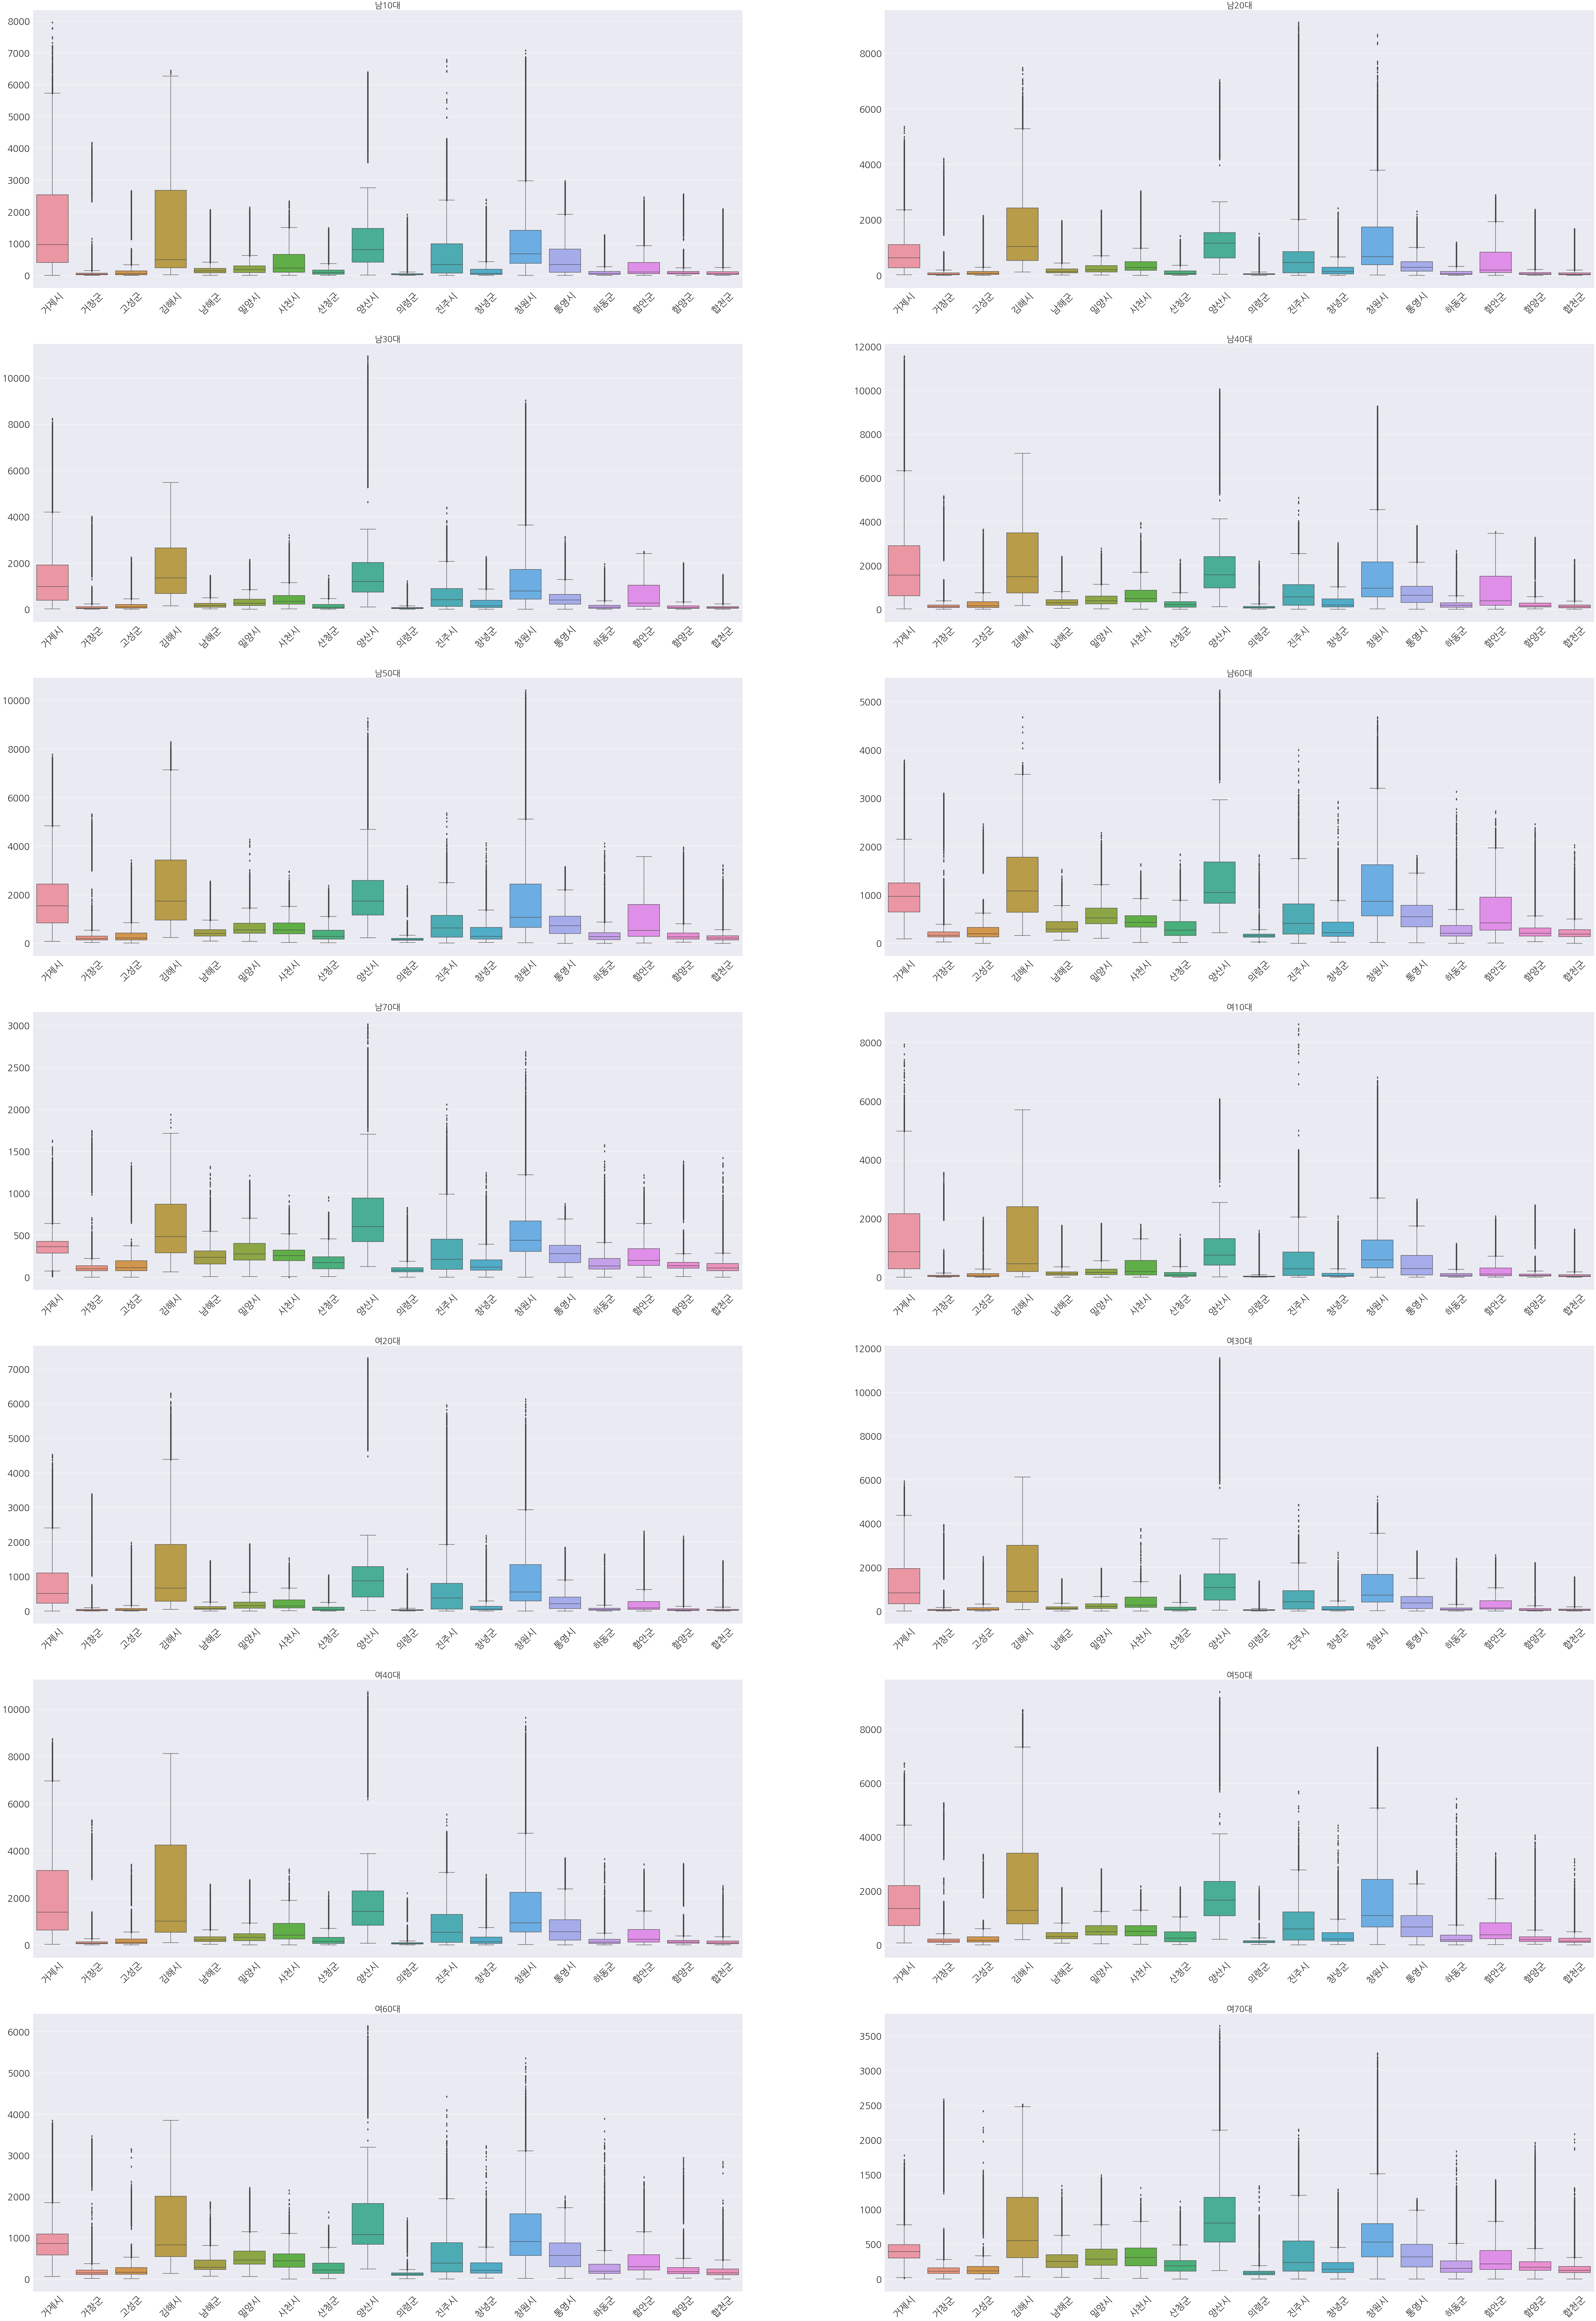

In [21]:
#Boxplot
    
fig, axs = plt.subplots(nrows = 7, ncols = 2)
fig.set_size_inches(100, 150)


for age, ax in zip(AGE_LIST, axs.ravel()):
    sns.set(font = font_family, rc = {'axes.unicode_minus' : False}, font_scale = 2.5)
    plt.rcParams['axes.facecolor'] = 'lavender'
    sns.boxplot(data = df_combine, x = '시군구', y = age, ax = ax)
    ax.set_title(age)
    ax.set(xlabel = None, ylabel = None)
    ax.set_xticklabels(df_combine['시군구'].unique(), rotation = 45)
    
    
plt.show()